In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
LABELS=["Normal","Fraud"]

In [2]:
dftrain = pd.read_csv("D:/Python/Financial/train_data.csv")

In [4]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [5]:
dftrain.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0
5,37590.0,-6.341667,1.192815,-3.686579,-2.754006,-5.007164,3.988118,1.693606,-13.577522,2.557965,...,9.779321,-3.660198,-1.507217,-0.179185,0.002092,-0.019168,3.611243,-0.894494,1437.08,0
6,56739.0,-0.463928,0.204745,2.795734,1.546200,-0.720374,1.108212,-0.581133,0.544075,1.099843,...,0.094431,0.788161,-0.100344,0.126248,-0.461584,-0.200985,0.280168,0.180046,11.10,0
7,912.0,-1.394619,0.554224,-0.617805,-0.313706,2.157413,3.537534,-0.567305,1.380888,-0.112291,...,-0.196300,-0.546172,-0.124758,1.046780,-0.089474,0.363674,0.215692,0.225698,24.08,0
8,171058.0,-2.121785,-1.518485,2.667942,-2.458839,-1.414952,0.807935,-1.870160,0.516477,-0.553359,...,-0.079591,0.659885,-1.000976,-0.212991,0.420722,-0.019645,-0.482792,-0.407780,28.00,0
9,79450.0,-2.254788,-0.955967,0.590596,0.114744,-5.876531,3.364858,6.365904,-1.252960,0.243849,...,-0.601908,-0.092918,0.517855,0.534361,0.494493,0.301414,0.507071,-0.560888,1354.98,0


In [3]:
#Finding the Null Values of the training dataset
dftrain.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

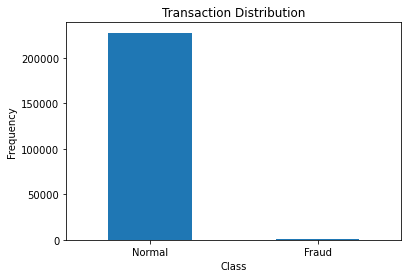

In [3]:
count_classes = pd.value_counts(dftrain['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Transaction Distribution')
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

### There are more than 250000 normal transactions

In [10]:
#Get the fraud and the normal dataset transactions
fraud = dftrain[dftrain['Class']==1]
normal = dftrain[dftrain['Class']==0]

In [12]:
print(fraud.shape,normal.shape)

(394, 31) (227451, 31)


### Normal transactions:227451 , Fraud: 394

In [11]:
#How different are the amount of money used in different transaction classes
fraud.Amount.describe()

count     394.000000
mean      127.306523
std       264.533907
min         0.000000
25%         1.000000
50%        11.395000
75%       106.385000
max      2125.870000
Name: Amount, dtype: float64

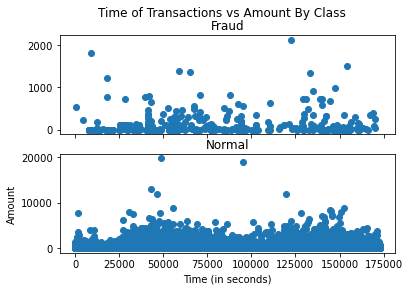

In [14]:
#How often fraud transactions occur more often during the certain  time?

f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Time of Transactions vs Amount By Class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

In [4]:
#Take data sample of 10%
data = dftrain.sample(frac=0.1,random_state=1)
data.shape

(22784, 31)

In [16]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

outlier_fraction = len(fraud)/float(len(normal))

In [17]:
print (outlier_fraction)
print("Fraud Cases:{}".format(len(fraud)))
print("Normal Cases:{}".format(len(normal)))

0.0020671152746624443
Fraud Cases:47
Normal Cases:22737


In [18]:
#Independent & dependent features
columns = data.columns.tolist()
#Remove the class column as target column
columns=[c for c in columns if c not in ["Class"]]
target = "Class"
state = np.random.RandomState(42)
X=data[columns]
y=data[target]
X_outliers = state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))

print(X.shape)
print(y.shape)

(22784, 30)
(22784,)


### Model Prediction using Isolation Forest
+ It is an technique to find the anomalies in the dataset.
+ It has a low time complexity & a small memory requirement.
+ A few conditions are needed to separate the cases from the normal observations.

In [19]:
from sklearn.ensemble import IsolationForest
#Outlier Detection Method
classifiers={
    "Isolation Forest":IsolationForest(n_estimators=100,max_samples=len(X),
                                                      contamination=outlier_fraction,random_state=state,verbose=0)
}

In [22]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
#Fit the data and find the outliers
    if clf_name == "Isolation Forest":
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

In [25]:
#Predict values 0 for fraud transactions & 1 for normal transactions
y_pred[y_pred==1]=0
y_pred[y_pred==-1]=1

n_errors = (y_pred!=y).sum()
#Classification metrics

print("{}:{}".format(clf_name,n_errors))
print("Accuracy Score:")
print(accuracy_score(y,y_pred))
print("Classification Report:")
print(classification_report(y,y_pred))

Isolation Forest:47
Accuracy Score:
0.9979371488764045
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22737
           1       0.00      0.00      0.00        47

    accuracy                           1.00     22784
   macro avg       0.50      0.50      0.50     22784
weighted avg       1.00      1.00      1.00     22784



C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ravi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
